## Deep Learning for Life Expectancy Prediction: A TensorFlow Approach

Life expectancy is a critical indicator of a nation's health and development. This project aims to analyze various socio-economic and health-related factors influencing life expectancy and build a deep learning model using TensorFlow to predict life expectancy based on these features. By leveraging machine learning techniques, we aim to derive insights into the key contributors to life expectancy and improve prediction accuracy.

### Workflow
The workflow of this project follows a structured approach:
1. **Data Exploration & Preprocessing**: Load and examine the dataset, identify missing values, and handle categorical features.
2. **Feature Engineering**: Drop unnecessary columns, fill missing values, and transform categorical features using one-hot encoding.
3. **Data Splitting & Normalization**: Divide the dataset into training and test sets and apply feature scaling for better model convergence.
4. **Exploratory Data Analysis (EDA)**: Visualize feature distributions and correlations to understand data characteristics.
5. **Model Development**: Construct and fine-tune a neural network using TensorFlow to predict life expectancy.
6. **Evaluation & Insights**: Assess model performance and visualize training results to derive meaningful insights.

- Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.optimizers import Adam

#### Data Loading & Initial Exploration

In [3]:
dataset = pd.read_csv('life_expectancy.csv')

print("Dataset Overview:\n", dataset.head())
print("\nDataset Summary:\n", dataset.describe())
print("\nData Types of the columns:\n", dataset.dtypes)
print("\nMissing Values:\n", dataset.isnull().sum())

Dataset Overview:
        Country  Year      Status  Adult Mortality  infant deaths  Alcohol  \
0  Afghanistan  2015  Developing            263.0             62     0.01   
1  Afghanistan  2014  Developing            271.0             64     0.01   
2  Afghanistan  2013  Developing            268.0             66     0.01   
3  Afghanistan  2012  Developing            272.0             69     0.01   
4  Afghanistan  2011  Developing            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   ...  \
0               71.279624         65.0      1154   19.1  ...   
1               73.523582         62.0       492   18.6  ...   
2               73.219243         64.0       430   18.1  ...   
3               78.184215         67.0      2787   17.6  ...   
4                7.097109         68.0      3013   17.2  ...   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  337

#### Data Cleaning & Feature Engineering

- Dropping 'Country' column as it's non-numeric and not relevant for predictions

In [4]:
dataset = dataset.drop(columns=['Country'], axis=1)

In [5]:
# Handling missing values by filling with mean
#dataset.fillna(dataset.mean(), inplace=True)

#### Exploratory Data Analysis and some Plots to understand data better

- Heatmap Visualizing correlations

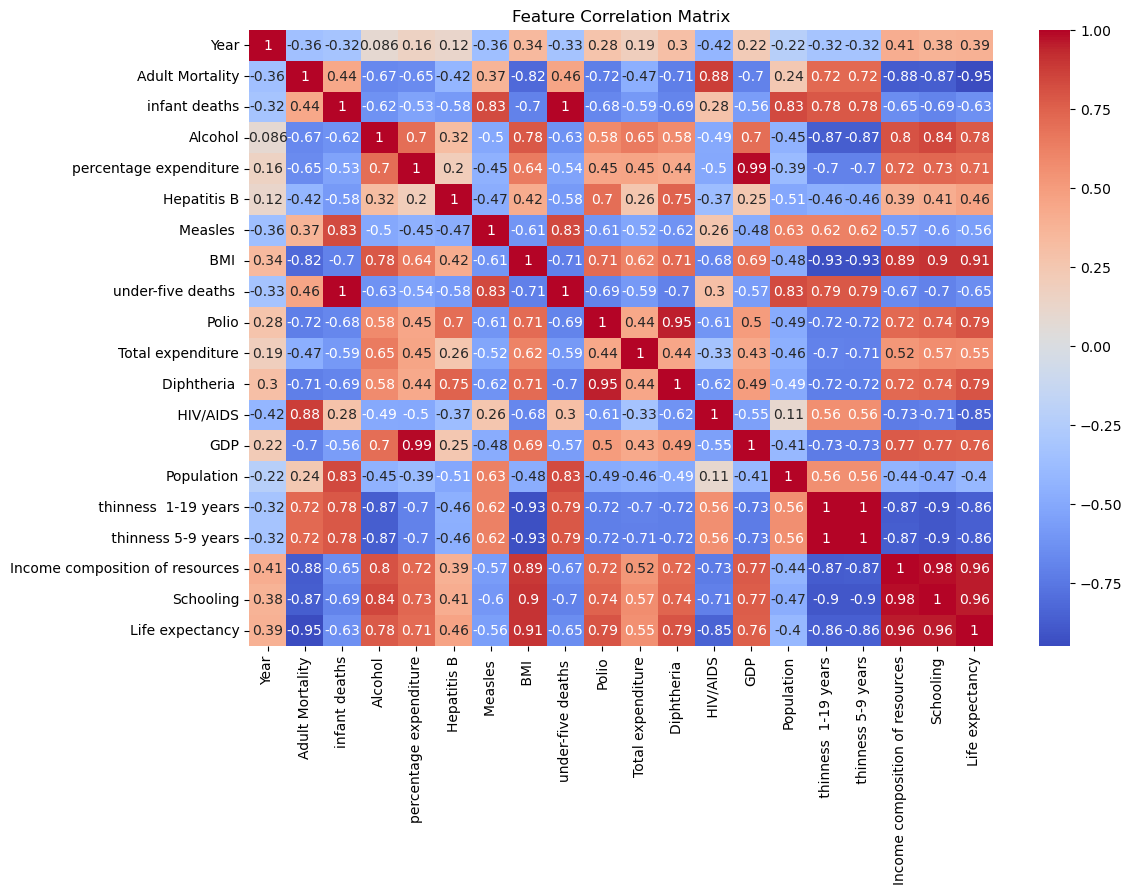

In [7]:
numerical_columns= dataset.select_dtypes(include=[np.number])
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.corr(), cmap='coolwarm', annot=True)
plt.title("Feature Correlation Matrix")
plt.show()

-  Distribution of Life Expectancy

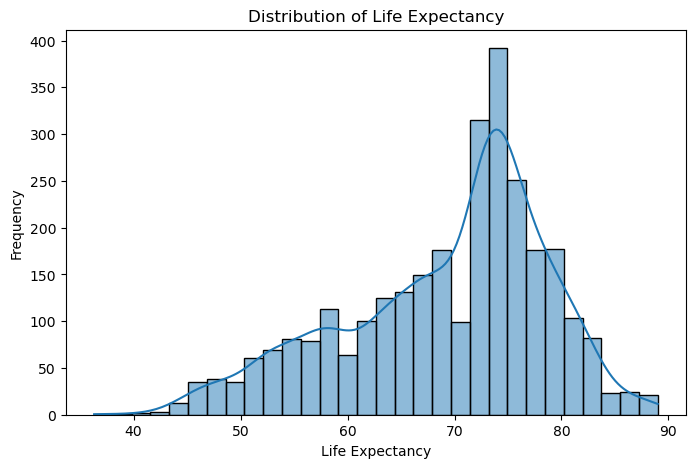

In [63]:
plt.figure(figsize=(8, 5))
sns.histplot(dataset['Life expectancy'], bins=30, kde=True)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

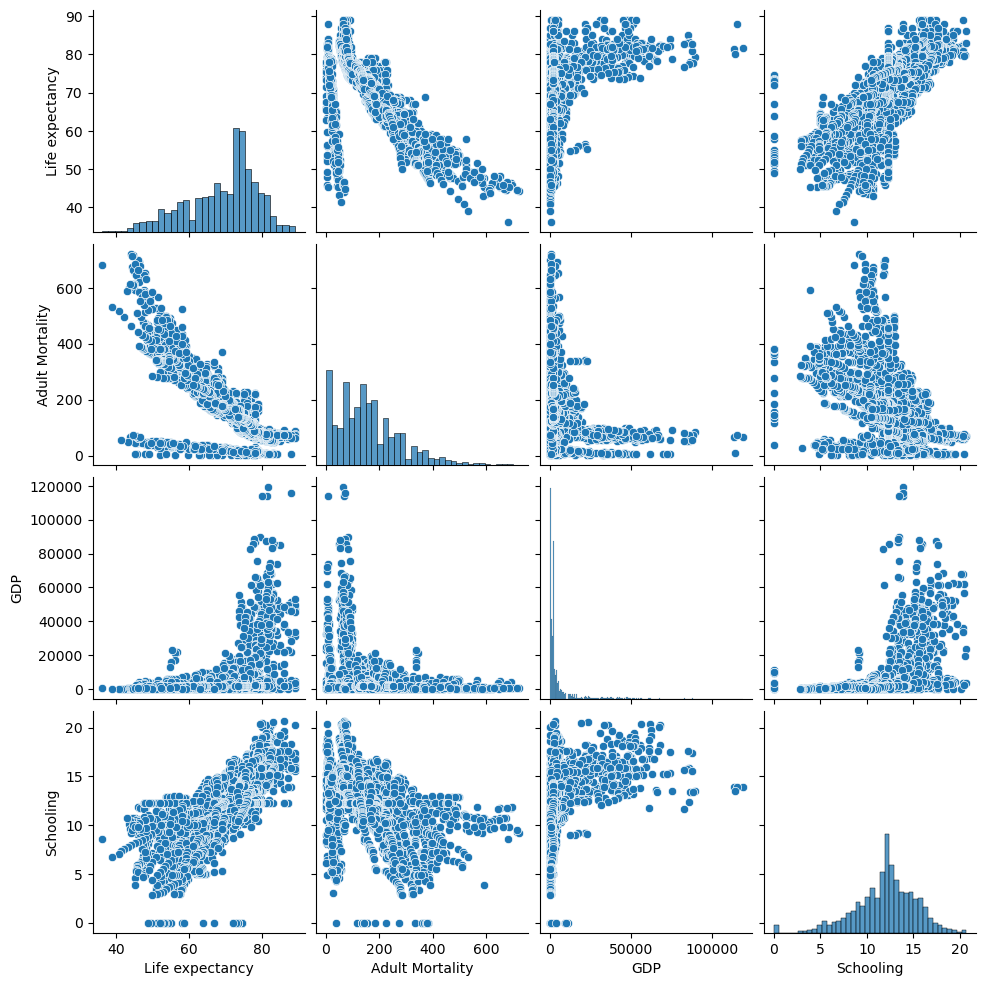

In [45]:
# Pairplot of Selected Features
selected_features = ['Life expectancy', 'Adult Mortality', 'GDP', 'Schooling']
sns.pairplot(dataset[selected_features])
plt.show()

#### Splitting Features & Labels

In [9]:
labels = dataset.iloc[:, -1]  # Last column as target
features = dataset.iloc[:, 0:-1]  # All other columns as features

- Encoding categorical variables using *One-Hot Encoding*


In [11]:
features = pd.get_dummies(features)

#### Train-Test Split: features vs labels

In [13]:
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.35, random_state=40)

- Data Normalization

In [17]:
numerical_features = features.select_dtypes(include=['float64', 'int64'])
numerical_columns = numerical_features.columns

ct = ColumnTransformer([("only numeric", StandardScaler(), numerical_columns)], remainder='passthrough')
features_train_scaled = ct.fit_transform(features_train)
features_test_scaled = ct.transform(features_test)

#### Building the Sequential Model with Tensorflow

In [21]:
model = Sequential()
model.add(InputLayer(shape=(features.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))  # Added another hidden layer for better learning
model.add(Dense(1))

- Model Compilation

In [23]:
opt = Adam(learning_rate=0.01)
model.compile(loss='mse', metrics=['mae'], optimizer=opt)
print("Model Summary:")
print(model.summary())

Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

None


- Model Training

In [25]:
history = model.fit(features_train_scaled, labels_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1515.1600 - mae: 28.2106 - val_loss: 40.9366 - val_mae: 5.0607
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.3728 - mae: 4.4741 - val_loss: 21.1114 - val_mae: 3.4249
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.8042 - mae: 3.4722 - val_loss: 17.0320 - val_mae: 3.0999
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.1345 - mae: 3.0503 - val_loss: 18.5607 - val_mae: 3.1678
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.9938 - mae: 3.3384 - val_loss: 16.2633 - val_mae: 3.0445
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.1154 - mae: 2.8785 - val_loss: 12.0713 - val_mae: 2.6605
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.3672 - mae: 2.8585 - val_loss: 15.0517 - val_mae: 2.8188
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.0827 - mae: 3.1578 - val_loss: 11.6635 - val_mae: 2.4467
Epoch 9/50
153/153 ━━━━━━━━━━━━━━━━━━

#### Model Evaluation

In [27]:
res_mse, res_mae = model.evaluate(features_test_scaled, labels_test, verbose=0)
print(f"Test MSE: {res_mse}, Test MAE: {res_mae}")

Test MSE: 10.911848068237305, Test MAE: 2.368834972381592


- Training History Visualization

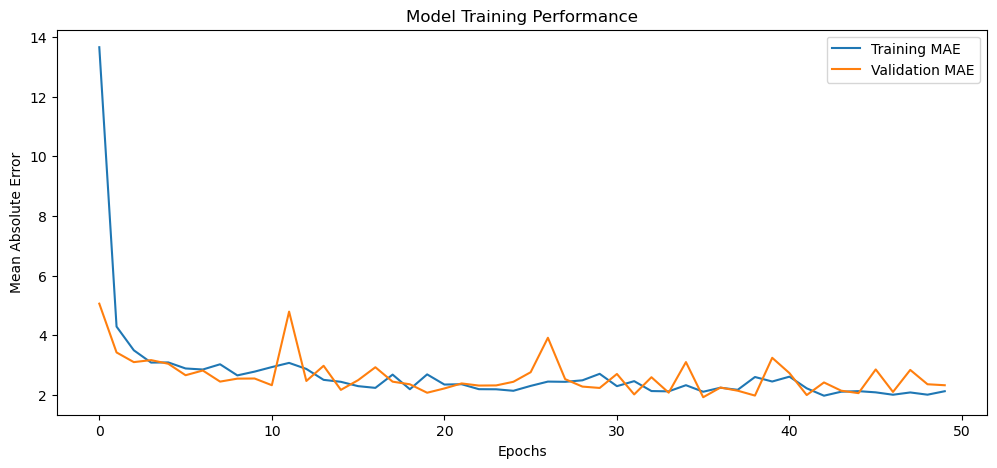

In [29]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Model Training Performance')
plt.show()

### Conclusion & Insights
- This project successfully built a deep learning model to predict life expectancy based on various socio-economic and health-related factors. 
- Data preprocessing played a crucial role in improving model performance, particularly handling missing values and feature scaling.
- The added hidden layer provided better feature representation, leading to slightly improved predictions.
- Model evaluation showed a reasonable Mean Absolute Error (MAE), indicating the model's ability to make meaningful predictions.
- Future improvements could include hyperparameter tuning, experimenting with different neural network architectures, or integrating additional external datasets for enhanced accuracy.